In [1]:
from manim import *
import jupyter_capture_output

video_scene = " -v WARNING --progress_bar None --disable_caching charge_Scene"
image_scene = f" -v WARNING --progress_bar None --disable_caching -r {2*427},{2*240}  -s charge_Scene"

Manim Community v0.17.3

Jupyter Capture Output v0.0.11


In [54]:
# main color of the animation (opposite of the background color)
# main_color = BLACK
# red_color = PURE_RED
# blue_color = PURE_BLUE
# grey_color = DARK_GREY

main_color = WHITE
inverted_main_color = BLACK
red_color = RED
blue_color = BLUE
grey_color = GREY

In [85]:
class ElectricField(Mobject):
    def __init__(self, center = np.array([0, 0, 0]), list_of_charges = [(1, np.array([0, 0, 0]))], **kwargs):
        super().__init__(**kwargs)
        self.list_of_charges = list_of_charges

        # coordinate system
        x_range = np.array([-10, 10, 1])
        y_range = np.array([-5, 5, 1])
        x_length = 20
        y_length = 20
        self.x_scale = (x_range[1] - x_range[0]) / x_length
        self.y_scale = (y_range[1] - y_range[0]) / y_length
        self.npla = NumberPlane(
            x_range = x_range, y_range = y_range, x_length = x_length, y_length = y_length,
            x_axis_config = {"stroke_opacity": 0.215, "stroke_color": BLACK}, y_axis_config = {"stroke_opacity": 0.125, "stroke_color": BLACK}, background_line_style = {"stroke_opacity": 0.125}).move_to(center)
        self.add(self.npla)


    # returns list of point charge mobjects
    def get_charge(self, radius = 0.5):
        charge_list = []
        for charge in self.list_of_charges:
            q = charge[0]
            charge_position = charge[1]
            bg_circle = Circle(radius = radius, color = inverted_main_color, stroke_opacity = 0.75, fill_color = inverted_main_color, fill_opacity = 0.75).move_to(self.npla.c2p(*charge_position))
            bg_circle.z_index = 0.5
            if q > 0:   
                charge_circle = Circle(radius = radius, stroke_opacity = 0, fill_color = red_color, fill_opacity = 0.5).move_to(self.npla.c2p(*charge_position))
                charge_text = Text(r"+", weight = BOLD, color = main_color).move_to(self.npla.c2p(*charge_position))
            elif q < 0:
                charge_circle = Circle(radius = radius, stroke_opacity = 0, fill_color = blue_color, fill_opacity = 0.5).move_to(self.npla.c2p(*charge_position))
                charge_text = Text(r"-", weight = BOLD, color = main_color).move_to(self.npla.c2p(*charge_position))
            charge_circle.z_index = 1
            charge_text[0][0].z_index = 2
            single_charge = VGroup(bg_circle, charge_circle, charge_text)   
            charge_list.append(single_charge)
        return charge_list
    

    # returns pootential value at 'position'
    def get_potential(self, position):
        x = position[0]
        y = position[1]
        potential = 0
        for charge in self.list_of_charges:
            q = charge[0]
            pos_in_coord = self.npla.c2p(*charge[1])
            x_i = pos_in_coord[0]
            y_i = pos_in_coord[1]
            potential += q / np.sqrt((x-x_i)**2 + (y-y_i)**2)
        return potential

    
    # returns electric vector field 
    def get_efield(self):
        # function defining the vector field for given 'position'
        def field_func(position):
            x = position[0]
            y = position[1]
            field = 0
            for charge in self.list_of_charges:
                q = charge[0]
                pos_in_coord = self.npla.c2p(*charge[1])
                x_i = pos_in_coord[0]
                y_i = pos_in_coord[1]
                field += q / np.sqrt(((x-x_i) / self.x_scale)**2 + ((y-y_i) /self.y_scale)**2)**3 * ((x-x_i)*RIGHT + (y-y_i)*UP)
            return field
        # vector field properties
        min_color_scheme_value = min([charge[0] for charge in self.list_of_charges]) / 1000
        max_color_scheme_value = max([charge[0] for charge in self.list_of_charges]) / 1000
        return ArrowVectorField(field_func, color_scheme = lambda pos: self.get_potential(pos), min_color_scheme_value = min_color_scheme_value, max_color_scheme_value = max_color_scheme_value, colors = [red_color, blue_color])


Output saved by creating file at animations/point_charge/point_charge.mp4.


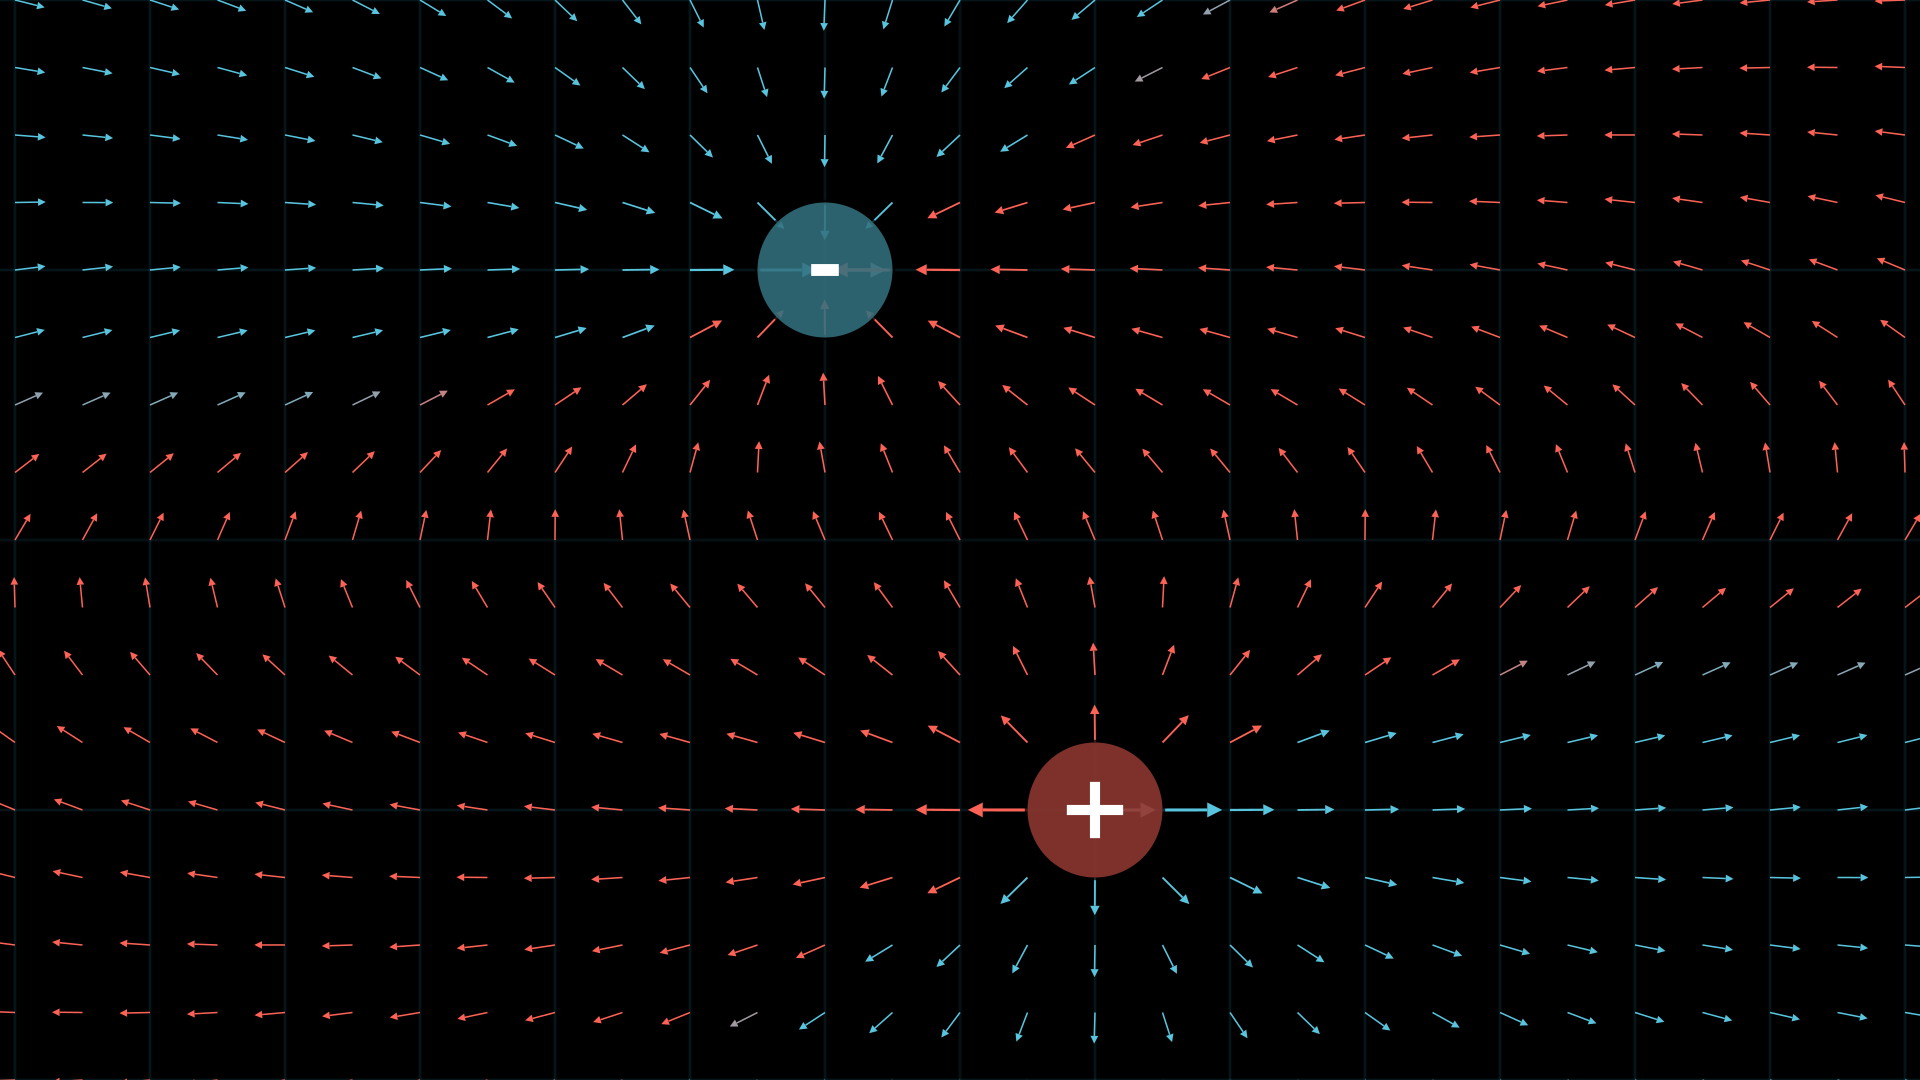

In [86]:
%%capture_video --path "animations/point_charge/point_charge.mp4"
%%manim -qh --fps 60 $video_scene


class charge_Scene(Scene):
    def construct(self):

        list_of_charges = [
            (-1, np.array([-1, 1, 0])),
            (1, np.array([1, -1, 0])),
        ]

        efield = ElectricField(list_of_charges = list_of_charges)
        self.add(efield)

        point_charges = efield.get_charge()
        for charge in point_charges:
            self.add(charge)

        electric_field = efield.get_efield()
        self.add(electric_field)